# Aula 5 - Séries Temporais de Ações

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from prophet import Prophet

In [11]:
dados = yf.download('JNJ', start='2020-01-01', end='2023-12-31', progress=False)
dados = dados.reset_index()
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099121,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592865,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432449,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216736,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198944,6605800


In [12]:
dados.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500
1005,2023-12-29,156.509995,156.899994,155.979996,156.740005,155.558899,4311100


In [13]:
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [14]:
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
dados_prophet_treino

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007
...,...,...
894,2023-07-24,171.080002
895,2023-07-25,172.389999
896,2023-07-26,172.720001
897,2023-07-27,173.690002


In [15]:
modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

21:59:14 - cmdstanpy - INFO - Chain [1] start processing
21:59:14 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
futuro = modelo.make_future_dataframe(periods=155)
previsao = modelo.predict(futuro)
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,146.375915,145.491107,155.723049,146.375915,146.375915,0.0,0.0,0.0,0.0,...,0.327372,0.327372,0.327372,4.070330,4.070330,4.070330,0.0,0.0,0.0,150.773617
1,2020-01-03,146.352650,144.984981,155.764619,146.352650,146.352650,0.0,0.0,0.0,0.0,...,0.464548,0.464548,0.464548,3.860316,3.860316,3.860316,0.0,0.0,0.0,150.677513
2,2020-01-06,146.282854,144.751106,155.207799,146.282854,146.282854,0.0,0.0,0.0,0.0,...,0.063913,0.063913,0.063913,3.190086,3.190086,3.190086,0.0,0.0,0.0,149.536853
3,2020-01-07,146.259589,144.292086,154.966071,146.259589,146.259589,0.0,0.0,0.0,0.0,...,0.234260,0.234260,0.234260,2.967958,2.967958,2.967958,0.0,0.0,0.0,149.461807
4,2020-01-08,146.236323,144.121300,154.355060,146.236323,146.236323,0.0,0.0,0.0,0.0,...,0.378460,0.378460,0.378460,2.753546,2.753546,2.753546,0.0,0.0,0.0,149.368329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,2023-12-26,149.605376,141.885748,167.614587,138.410827,160.706522,0.0,0.0,0.0,0.0,...,0.234260,0.234260,0.234260,4.950055,4.950055,4.950055,0.0,0.0,0.0,154.789690
1050,2023-12-27,149.553095,142.581328,166.779729,138.281287,160.736656,0.0,0.0,0.0,0.0,...,0.378460,0.378460,0.378460,4.908743,4.908743,4.908743,0.0,0.0,0.0,154.840297
1051,2023-12-28,149.500814,141.749183,166.768235,138.151746,160.766790,0.0,0.0,0.0,0.0,...,0.327372,0.327372,0.327372,4.835543,4.835543,4.835543,0.0,0.0,0.0,154.663729
1052,2023-12-29,149.448533,142.023052,167.089132,138.022785,160.796924,0.0,0.0,0.0,0.0,...,0.464548,0.464548,0.464548,4.732149,4.732149,4.732149,0.0,0.0,0.0,154.645230


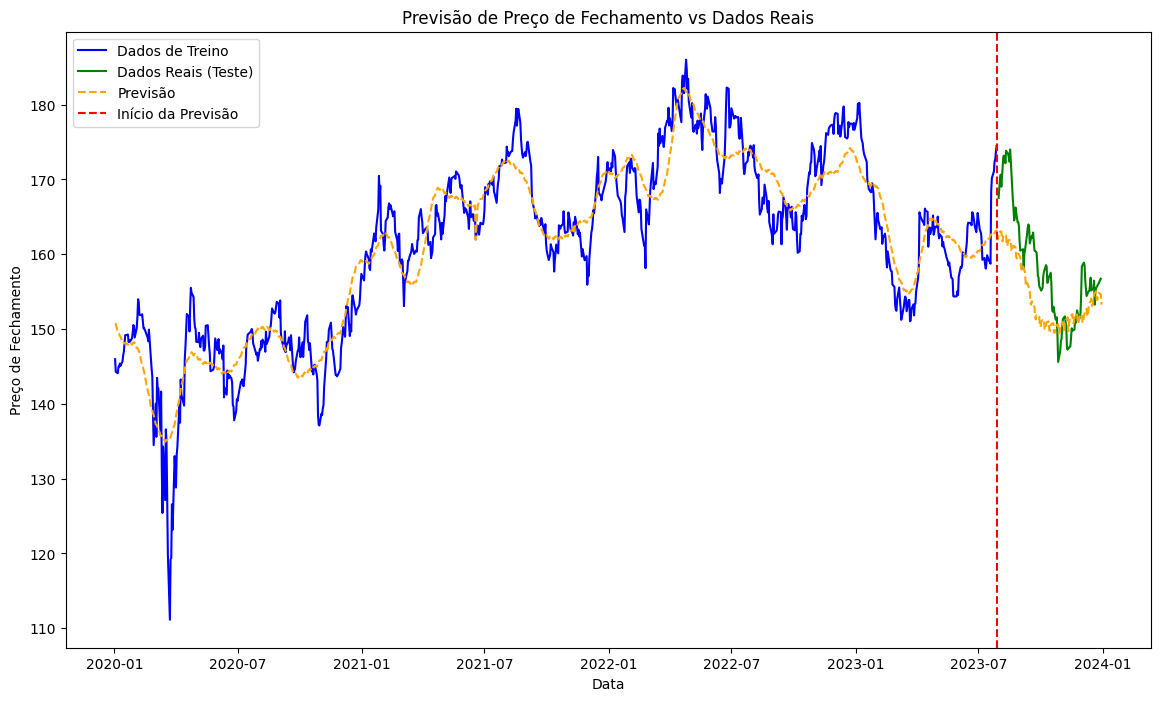

In [19]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()